CREDIT EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Data Set for application data 
app_data = pd.read_csv("application_data.csv")

# Importing Data Set for previous application data 
prev_data = pd.read_csv("previous_application.csv")

In [3]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
app_data.shape

(307511, 122)

In [8]:
prev_data.shape

(1670214, 37)

In [9]:
# Looking for null values
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
prev_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [11]:
# Get Column names with NULL percentage greater than 40%
cols = (app_data.isnull().mean()*100 > 40)[app_data.isnull().mean()*100 > 40].index.tolist()
cols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [12]:
len(cols)

49

In [13]:
# Dropping all the columns which have more than 40% null
app_data.drop(columns=cols,inplace=True)

In [14]:
app_data.shape

(307511, 73)

In [15]:
# Get Column names with NULL percentage greater than 40%
cols = (prev_data.isnull().mean()*100 > 40)[prev_data.isnull().mean()*100 > 40].index.tolist()
cols

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [16]:
len(cols)

11

In [17]:
# Dropping all the columns which have more than 40% null
prev_data.drop(columns=cols,inplace=True)

In [18]:
prev_data.shape

(1670214, 26)

In [19]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [20]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [21]:
# Taking Null value percentage 
app_data.isnull().sum()* 100 / len(app_data)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [22]:
prev_data.isnull().sum()* 100 / len(prev_data)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [23]:
# Filling NA with mean
app_data['AMT_ANNUITY'].fillna(app_data['AMT_ANNUITY'].mean(), inplace = True)
app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].mean(), inplace = True)
app_data['EXT_SOURCE_2'].fillna(app_data['EXT_SOURCE_2'].mean(), inplace = True)
app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].mean(), inplace = True)
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean(), inplace = True)
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_data['DEF_30_CNT_SOCIAL_CIRCLE'].mean(), inplace = True)
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_data['OBS_60_CNT_SOCIAL_CIRCLE'].mean(), inplace = True)
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_data['DEF_60_CNT_SOCIAL_CIRCLE'].mean(), inplace = True)
app_data['DAYS_LAST_PHONE_CHANGE'].fillna(app_data['DAYS_LAST_PHONE_CHANGE'].mean(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_MON'].mean(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mean(), inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace = True)

In [24]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [25]:
# Filling NA with mean
prev_data['AMT_ANNUITY'].fillna(prev_data['AMT_ANNUITY'].mean(), inplace = True)
prev_data['AMT_CREDIT'].fillna(prev_data['AMT_CREDIT'].mean(), inplace = True)
prev_data['AMT_GOODS_PRICE'].fillna(prev_data['AMT_GOODS_PRICE'].mean(), inplace = True)
prev_data['CNT_PAYMENT'].fillna(prev_data['CNT_PAYMENT'].mean(), inplace = True)
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [26]:
# Numerical and categorical data

In [27]:
categoricals = list(app_data.select_dtypes('object').columns)
print(categoricals)


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [28]:
# checking the distribution of categorical data
print(app_data.NAME_CONTRACT_TYPE.value_counts())
print(app_data.CODE_GENDER.value_counts())
print(app_data.FLAG_OWN_CAR.value_counts())
print(app_data.FLAG_OWN_REALTY.value_counts())
print(app_data.NAME_TYPE_SUITE.value_counts())
print(app_data.NAME_INCOME_TYPE.value_counts())
print(app_data.NAME_EDUCATION_TYPE.value_counts())
print(app_data.NAME_FAMILY_STATUS.value_counts())
print(app_data.NAME_HOUSING_TYPE.value_counts())
print(app_data.OCCUPATION_TYPE.value_counts())
print(app_data.WEEKDAY_APPR_PROCESS_START.value_counts())
print(app_data.ORGANIZATION_TYPE.value_counts())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUC

In [29]:
# replacing XNA in gender column
app_data.CODE_GENDER.replace('XNA','F',inplace=True)

In [30]:
print(app_data.CODE_GENDER.value_counts())

F    202452
M    105059
Name: CODE_GENDER, dtype: int64


In [31]:
# For previous application
categoricals = list(prev_data.select_dtypes('object').columns)
print(categoricals)

['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [32]:
# Merging both data sets to one single data
data_merge = app_data.merge(prev_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
data_merge.shape

(1413701, 98)

In [33]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 98 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413701 non-null  float64
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64
 11  NAME_TYPE_SUITE               1410175 non-null  object 
 12  NAME_INCOME_TYPE            

In [34]:
# Visalisations

Text(0, 0.5, 'Count')

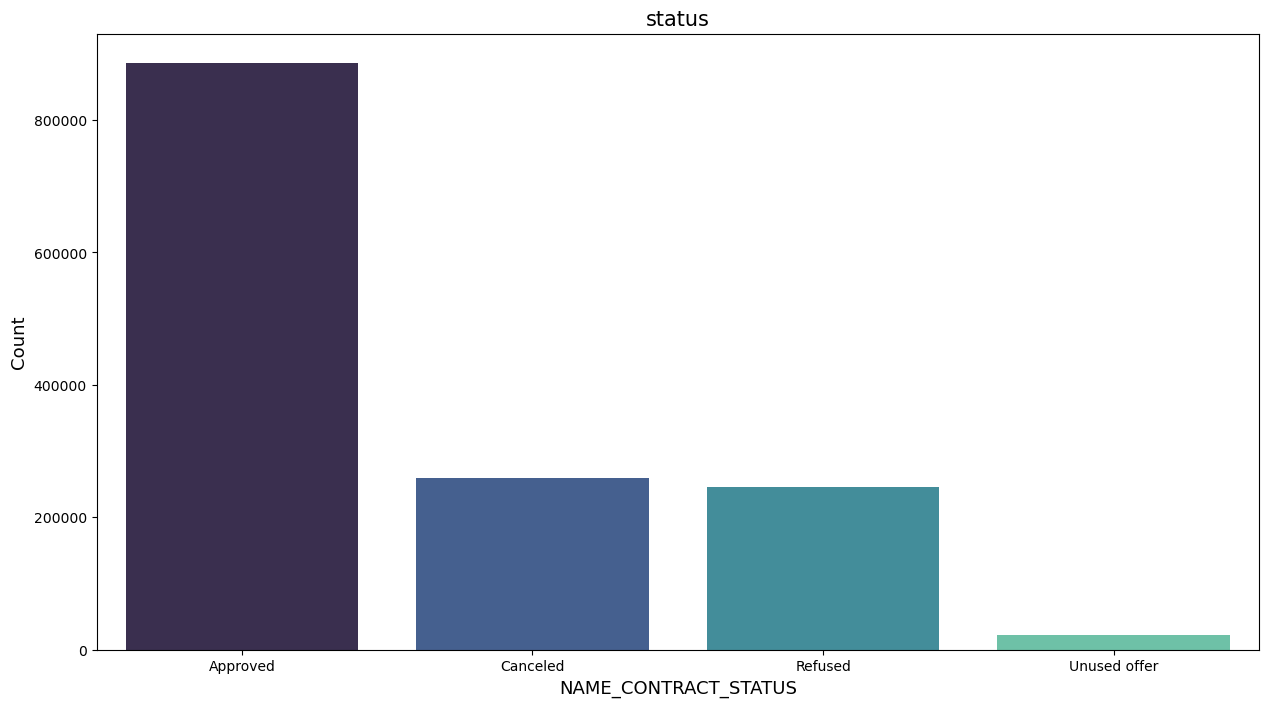

In [35]:
# plotting bar chart for overall status of applications
plt.figure(figsize=(15,8))
count_model = data_merge['NAME_CONTRACT_STATUS'].value_counts().sort_values(ascending=False)
sns.countplot(data=data_merge, x='NAME_CONTRACT_STATUS',order=count_model.index,palette="mako")
plt.title('status',size=15)
plt.xlabel('NAME_CONTRACT_STATUS',size=13)
plt.ylabel('Count',size=13)

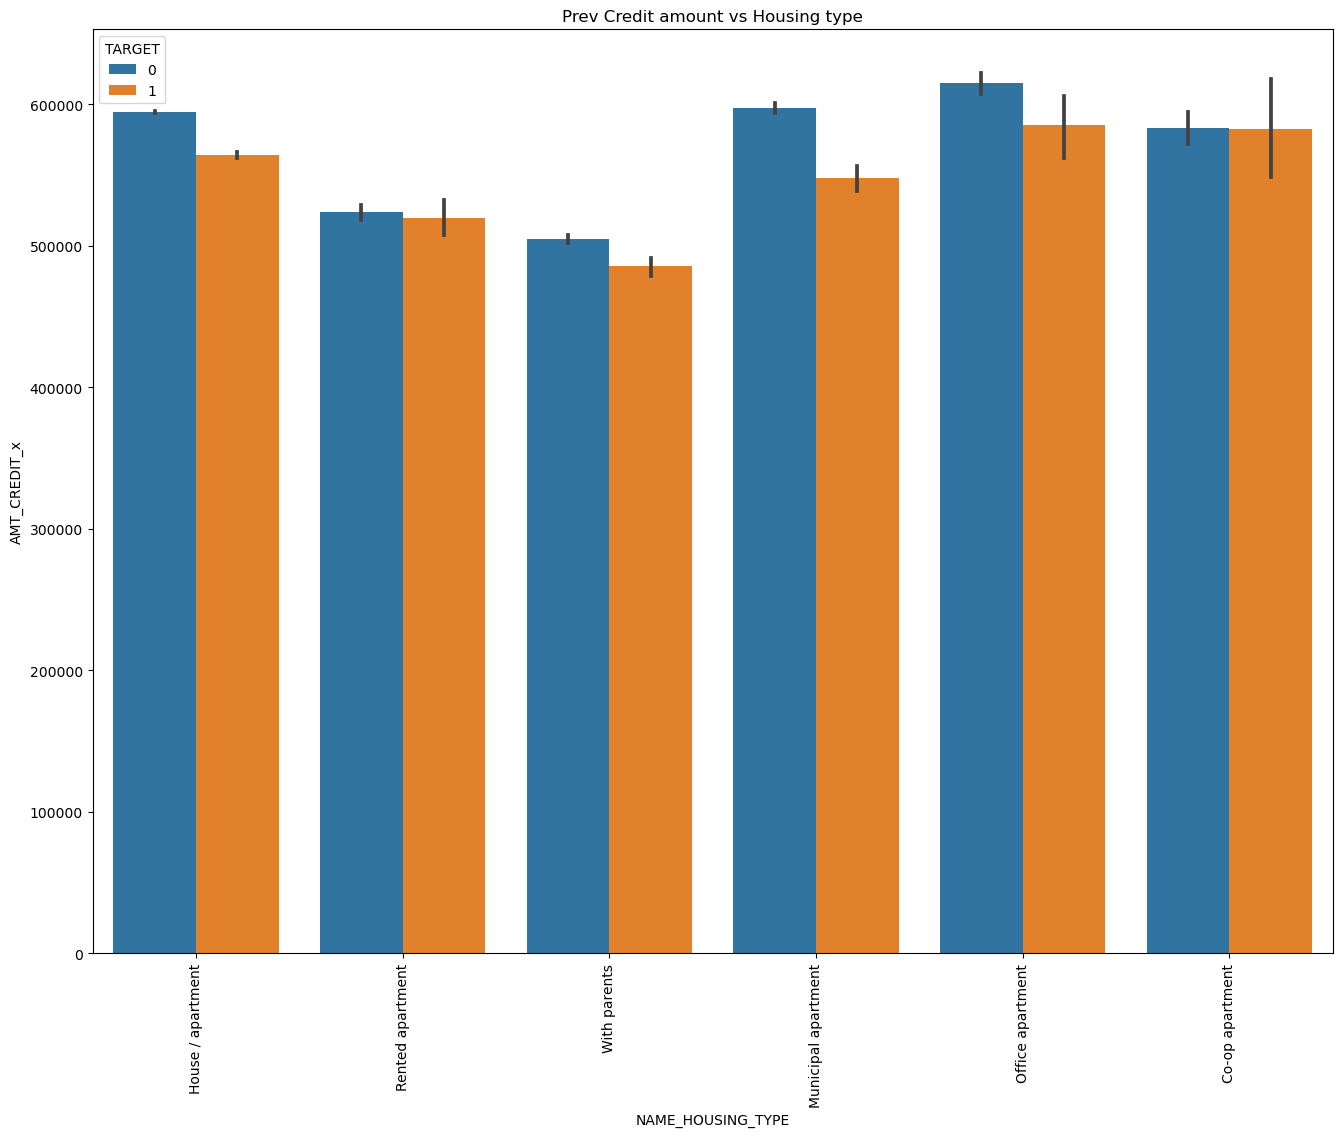

In [36]:
# Bar plotting for Credit amount prev vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data = data_merge, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

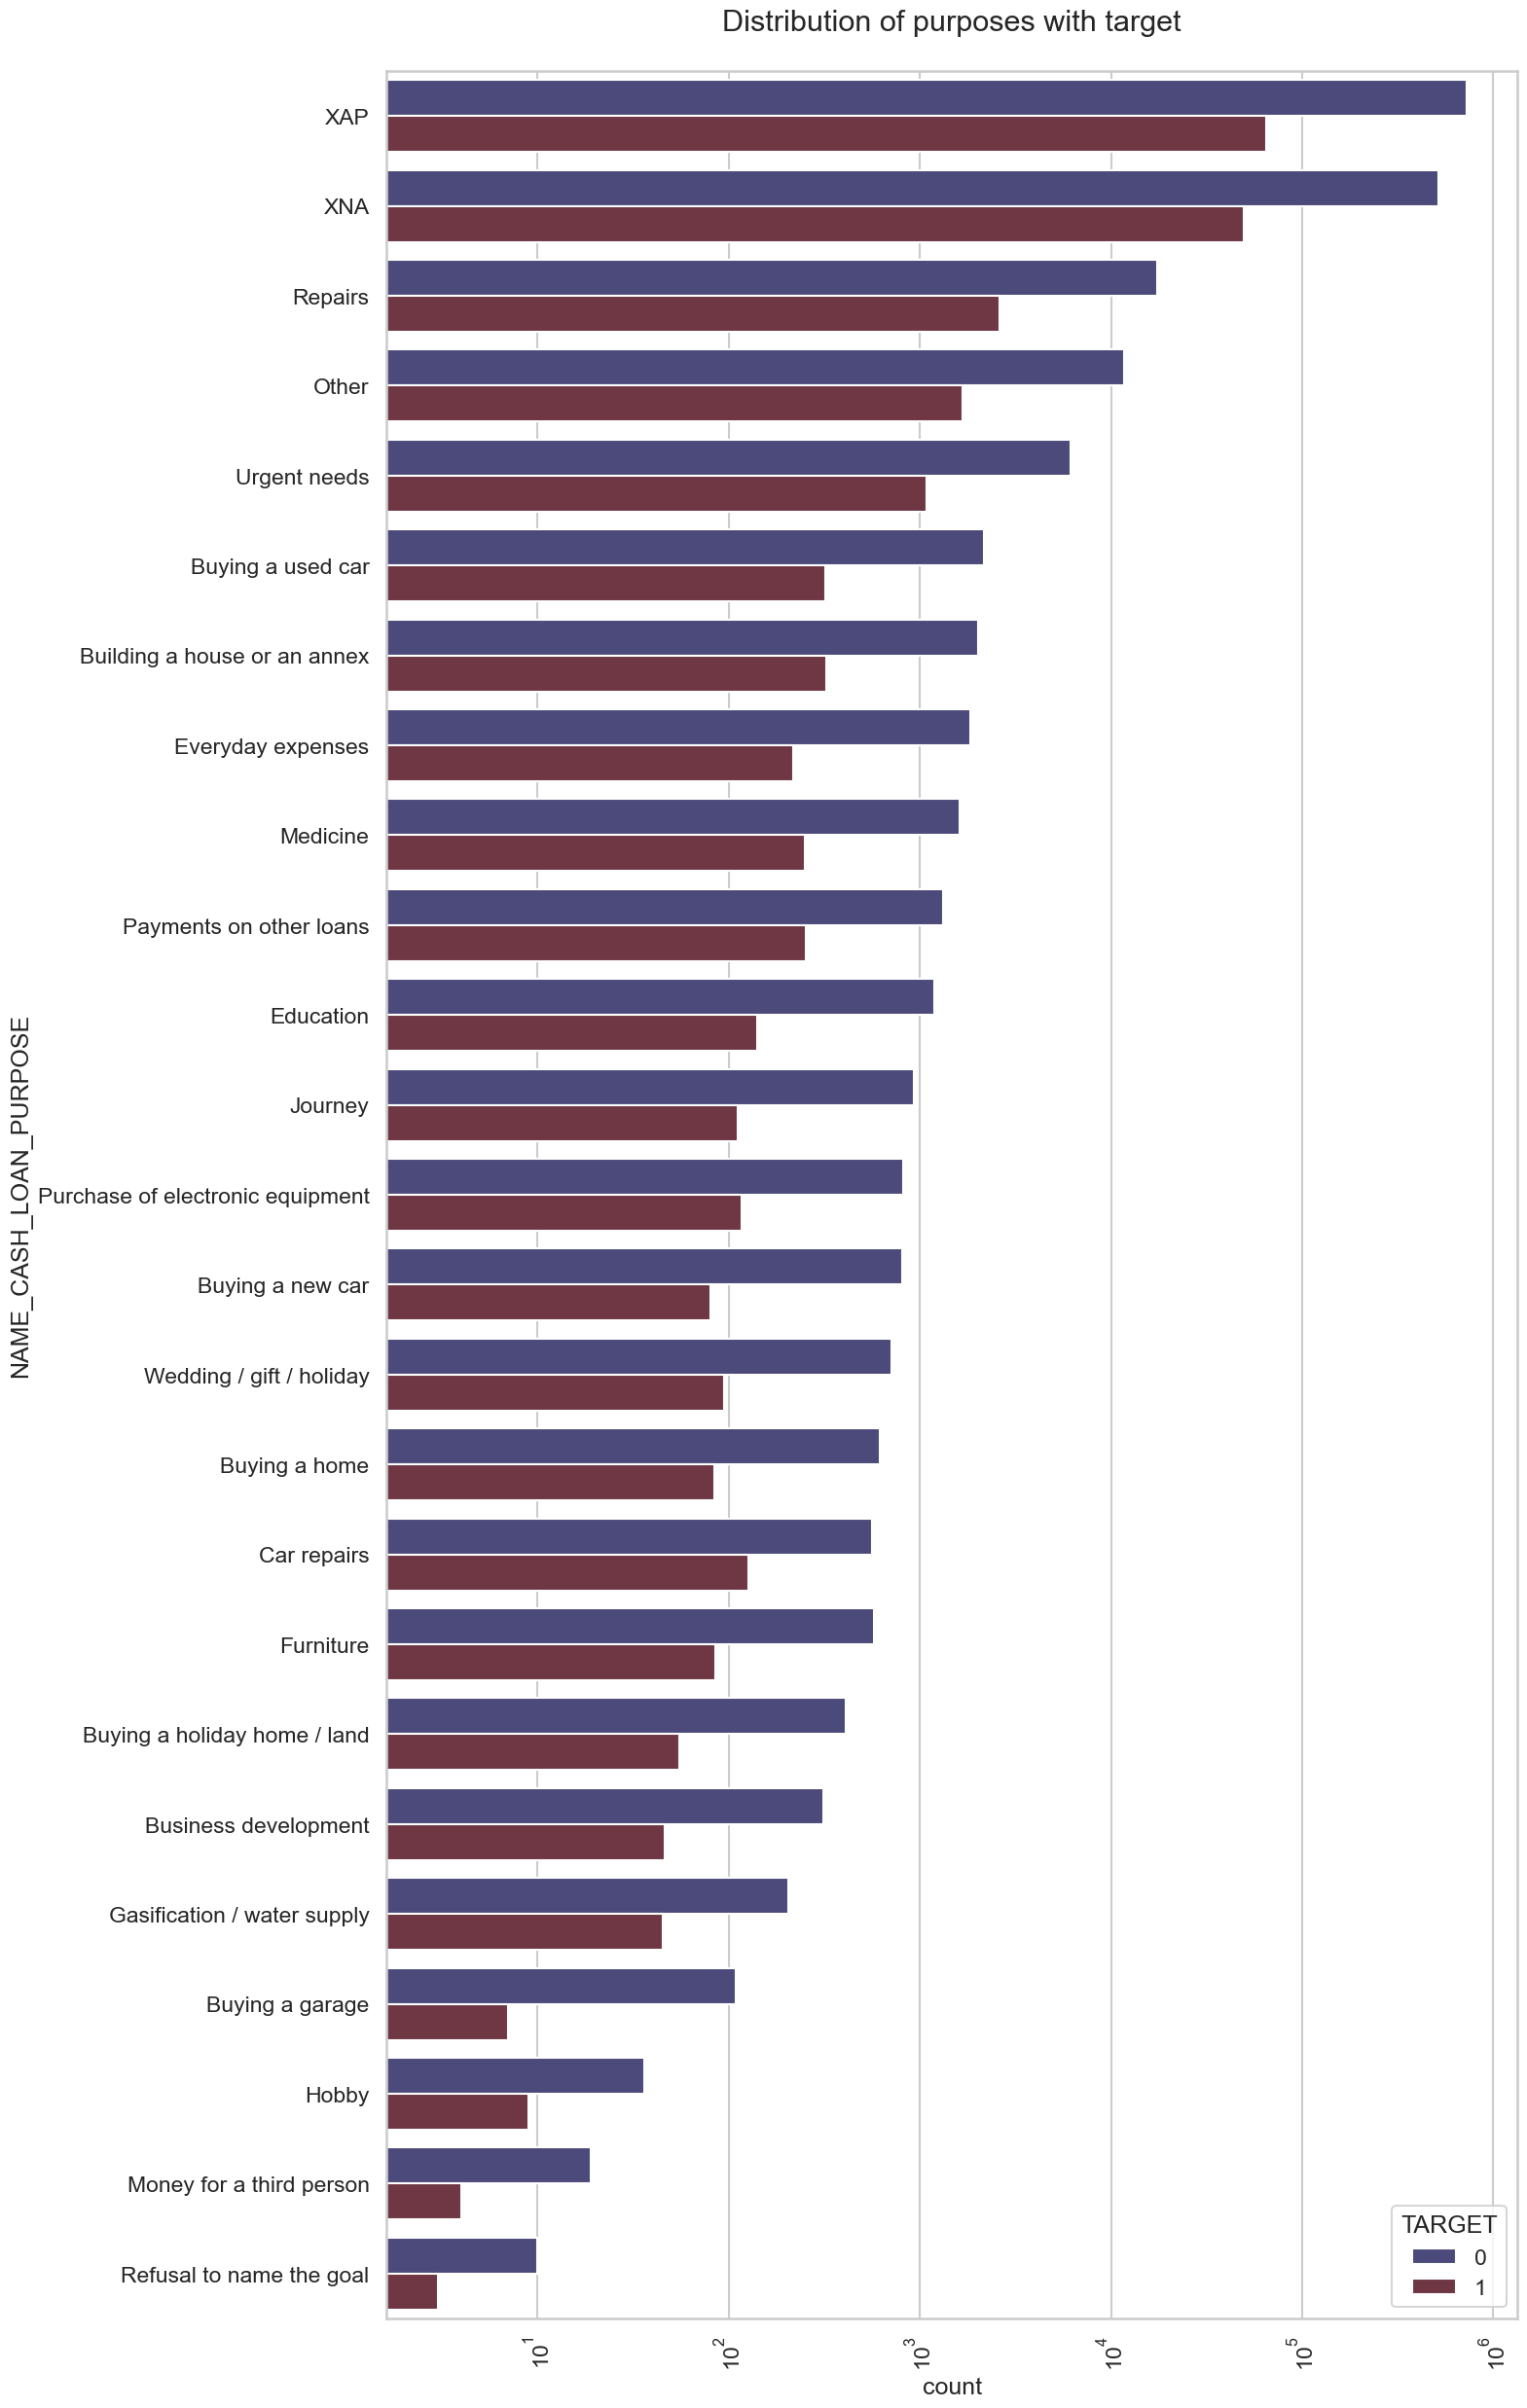

In [37]:
# Distribution and utilisation of loan amount 

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target')

ax = sns.countplot(data = data_merge, y= 'NAME_CASH_LOAN_PURPOSE', order=data_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue ='TARGET', palette='icefire')

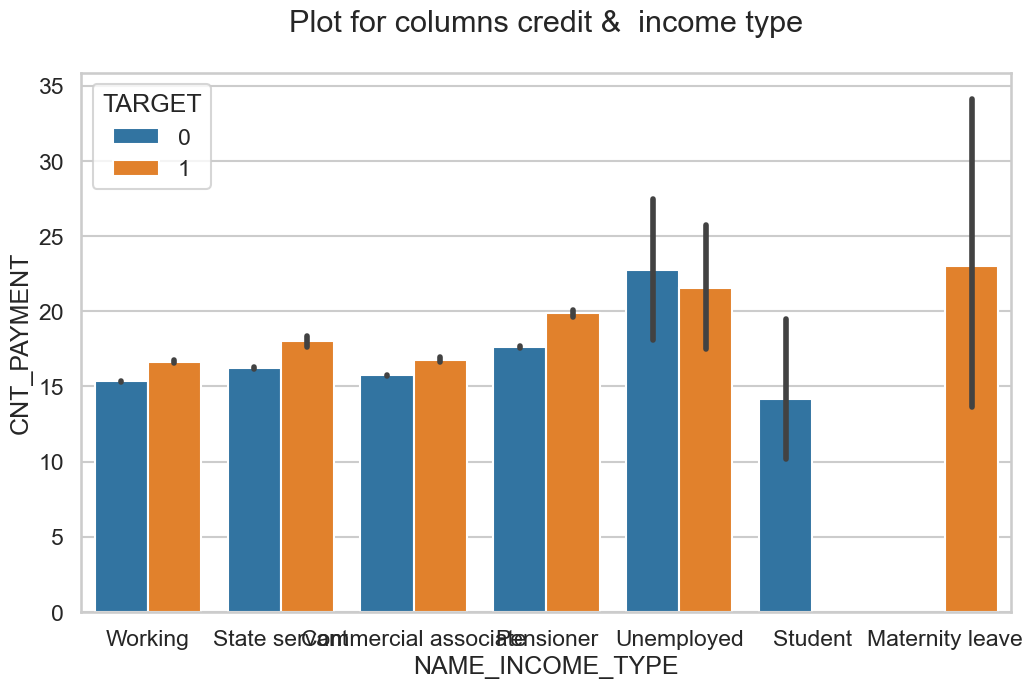

In [38]:
# Bar plot for approved credit vs income type
plt.figure(figsize=(12,7))
sns.barplot(data =data_merge, y='CNT_PAYMENT',hue='TARGET',x='NAME_INCOME_TYPE')
plt.title("Plot for columns credit &  income type")
plt.show()

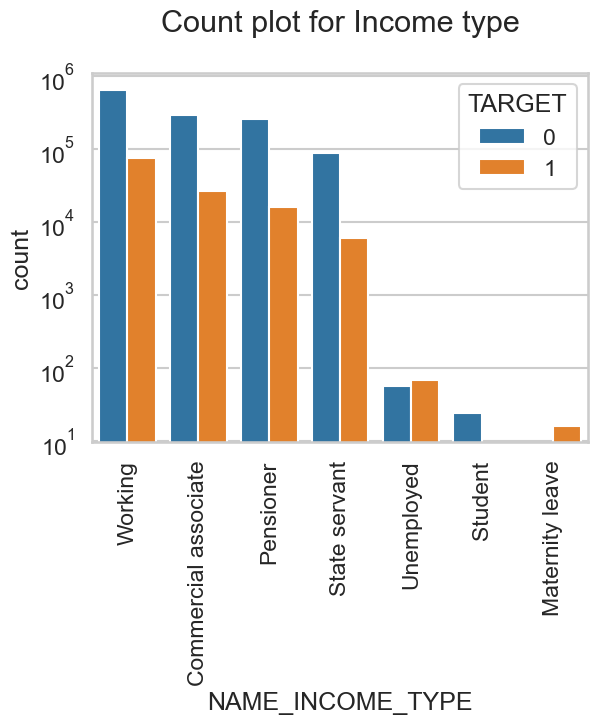

In [39]:
# Plotting for Income type vs target column 

sns.countplot(data = data_merge, x ='NAME_INCOME_TYPE', 
              order=data_merge['NAME_INCOME_TYPE'].value_counts().index, 
              hue='TARGET')
plt.title('Count plot for Income type')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

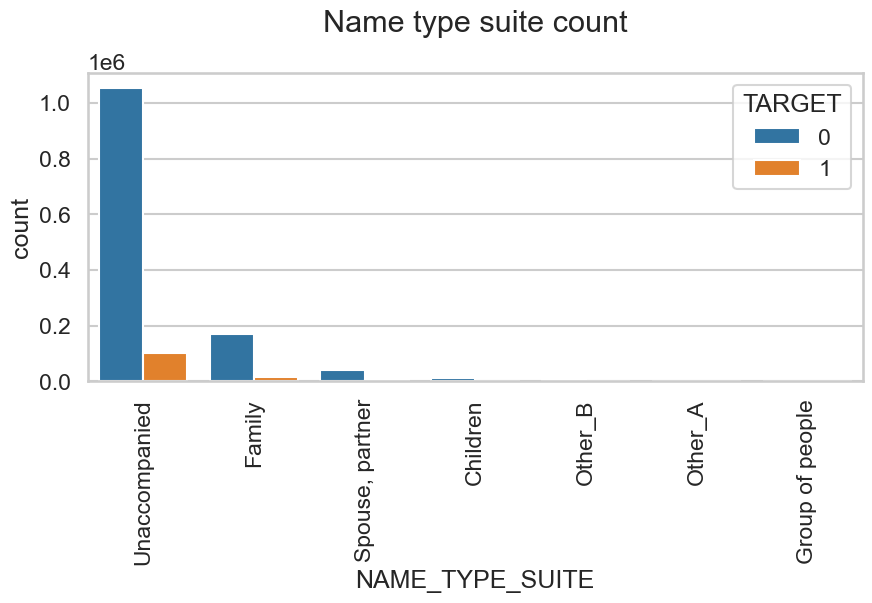

In [40]:
# Plotting for name type suite count

plt.figure(figsize = [10,4])
sns.countplot(data = data_merge, x ='NAME_TYPE_SUITE', 
              order=data_merge['NAME_TYPE_SUITE'].value_counts().index,
              hue = 'TARGET')
plt.title('Name type suite count')
#plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

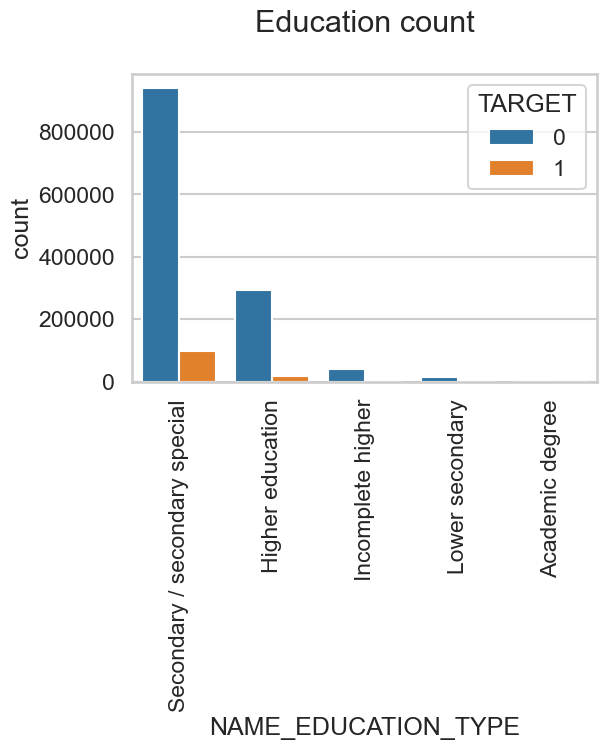

In [41]:
# Plotting for education type of applicants

plt.figure(figsize = [6,4])
sns.countplot(data = data_merge, x ='NAME_EDUCATION_TYPE', 
              order=data_merge['NAME_EDUCATION_TYPE'].value_counts().index,
              hue = 'TARGET')
plt.title('Education count')
plt.xticks(rotation = 90)
plt.show()

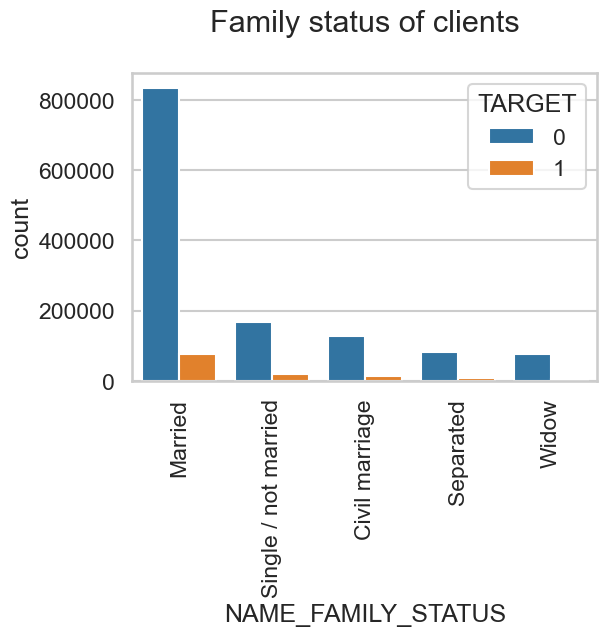

In [42]:
# Plotting for Family status of applicants

plt.figure(figsize = [6,4])
sns.countplot(data = data_merge, x ='NAME_FAMILY_STATUS', 
              order=data_merge['NAME_FAMILY_STATUS'].value_counts().index,
              hue = 'TARGET')
plt.title('Family status of clients')
plt.xticks(rotation = 90)
plt.show()

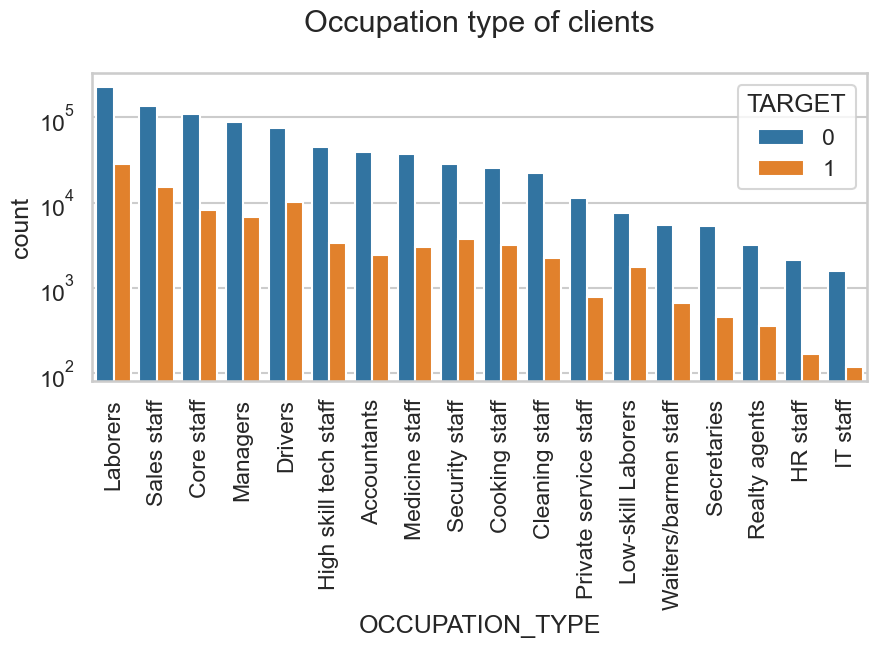

In [43]:
# Plotting for Occupation type of applicants 

plt.figure(figsize = [10,4])
sns.countplot(data = data_merge, x ='OCCUPATION_TYPE', 
              order=data_merge['OCCUPATION_TYPE'].value_counts().index,
              hue = 'TARGET')
plt.title('Occupation type of clients')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

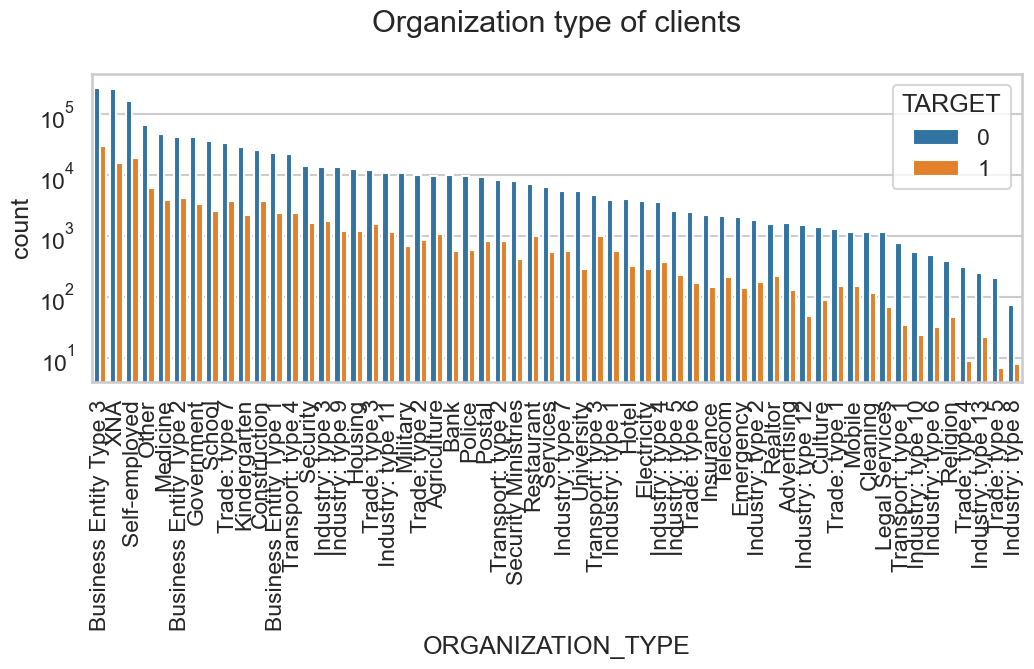

In [44]:
# Plotting for Organization type of applicants

plt.figure(figsize = [12,4])
sns.countplot(data = data_merge, x ='ORGANIZATION_TYPE', 
              order=data_merge['ORGANIZATION_TYPE'].value_counts().index,
              hue = 'TARGET')
plt.title('Organization type of clients')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

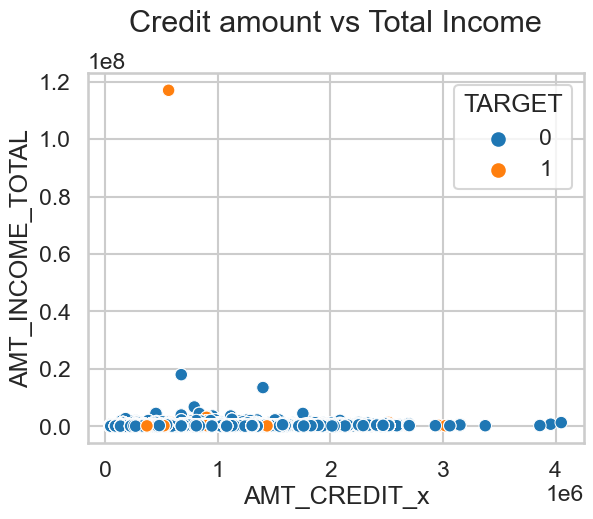

In [45]:
# scatter plot for credit amount vs total income of the applicants
sns.scatterplot(data=data_merge,x='AMT_CREDIT_x',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.title('Credit amount vs Total Income')
plt.show()

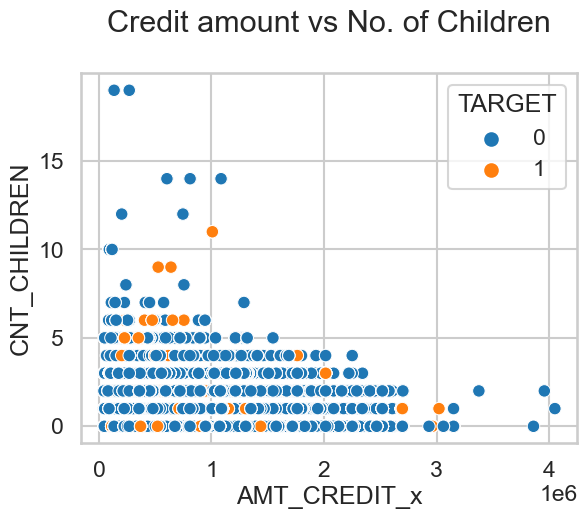

In [46]:
# scatter plot for credit amount vs children
sns.scatterplot(data=data_merge,x='AMT_CREDIT_x',y='CNT_CHILDREN',hue='TARGET')
plt.title('Credit amount vs No. of Children')
plt.show()

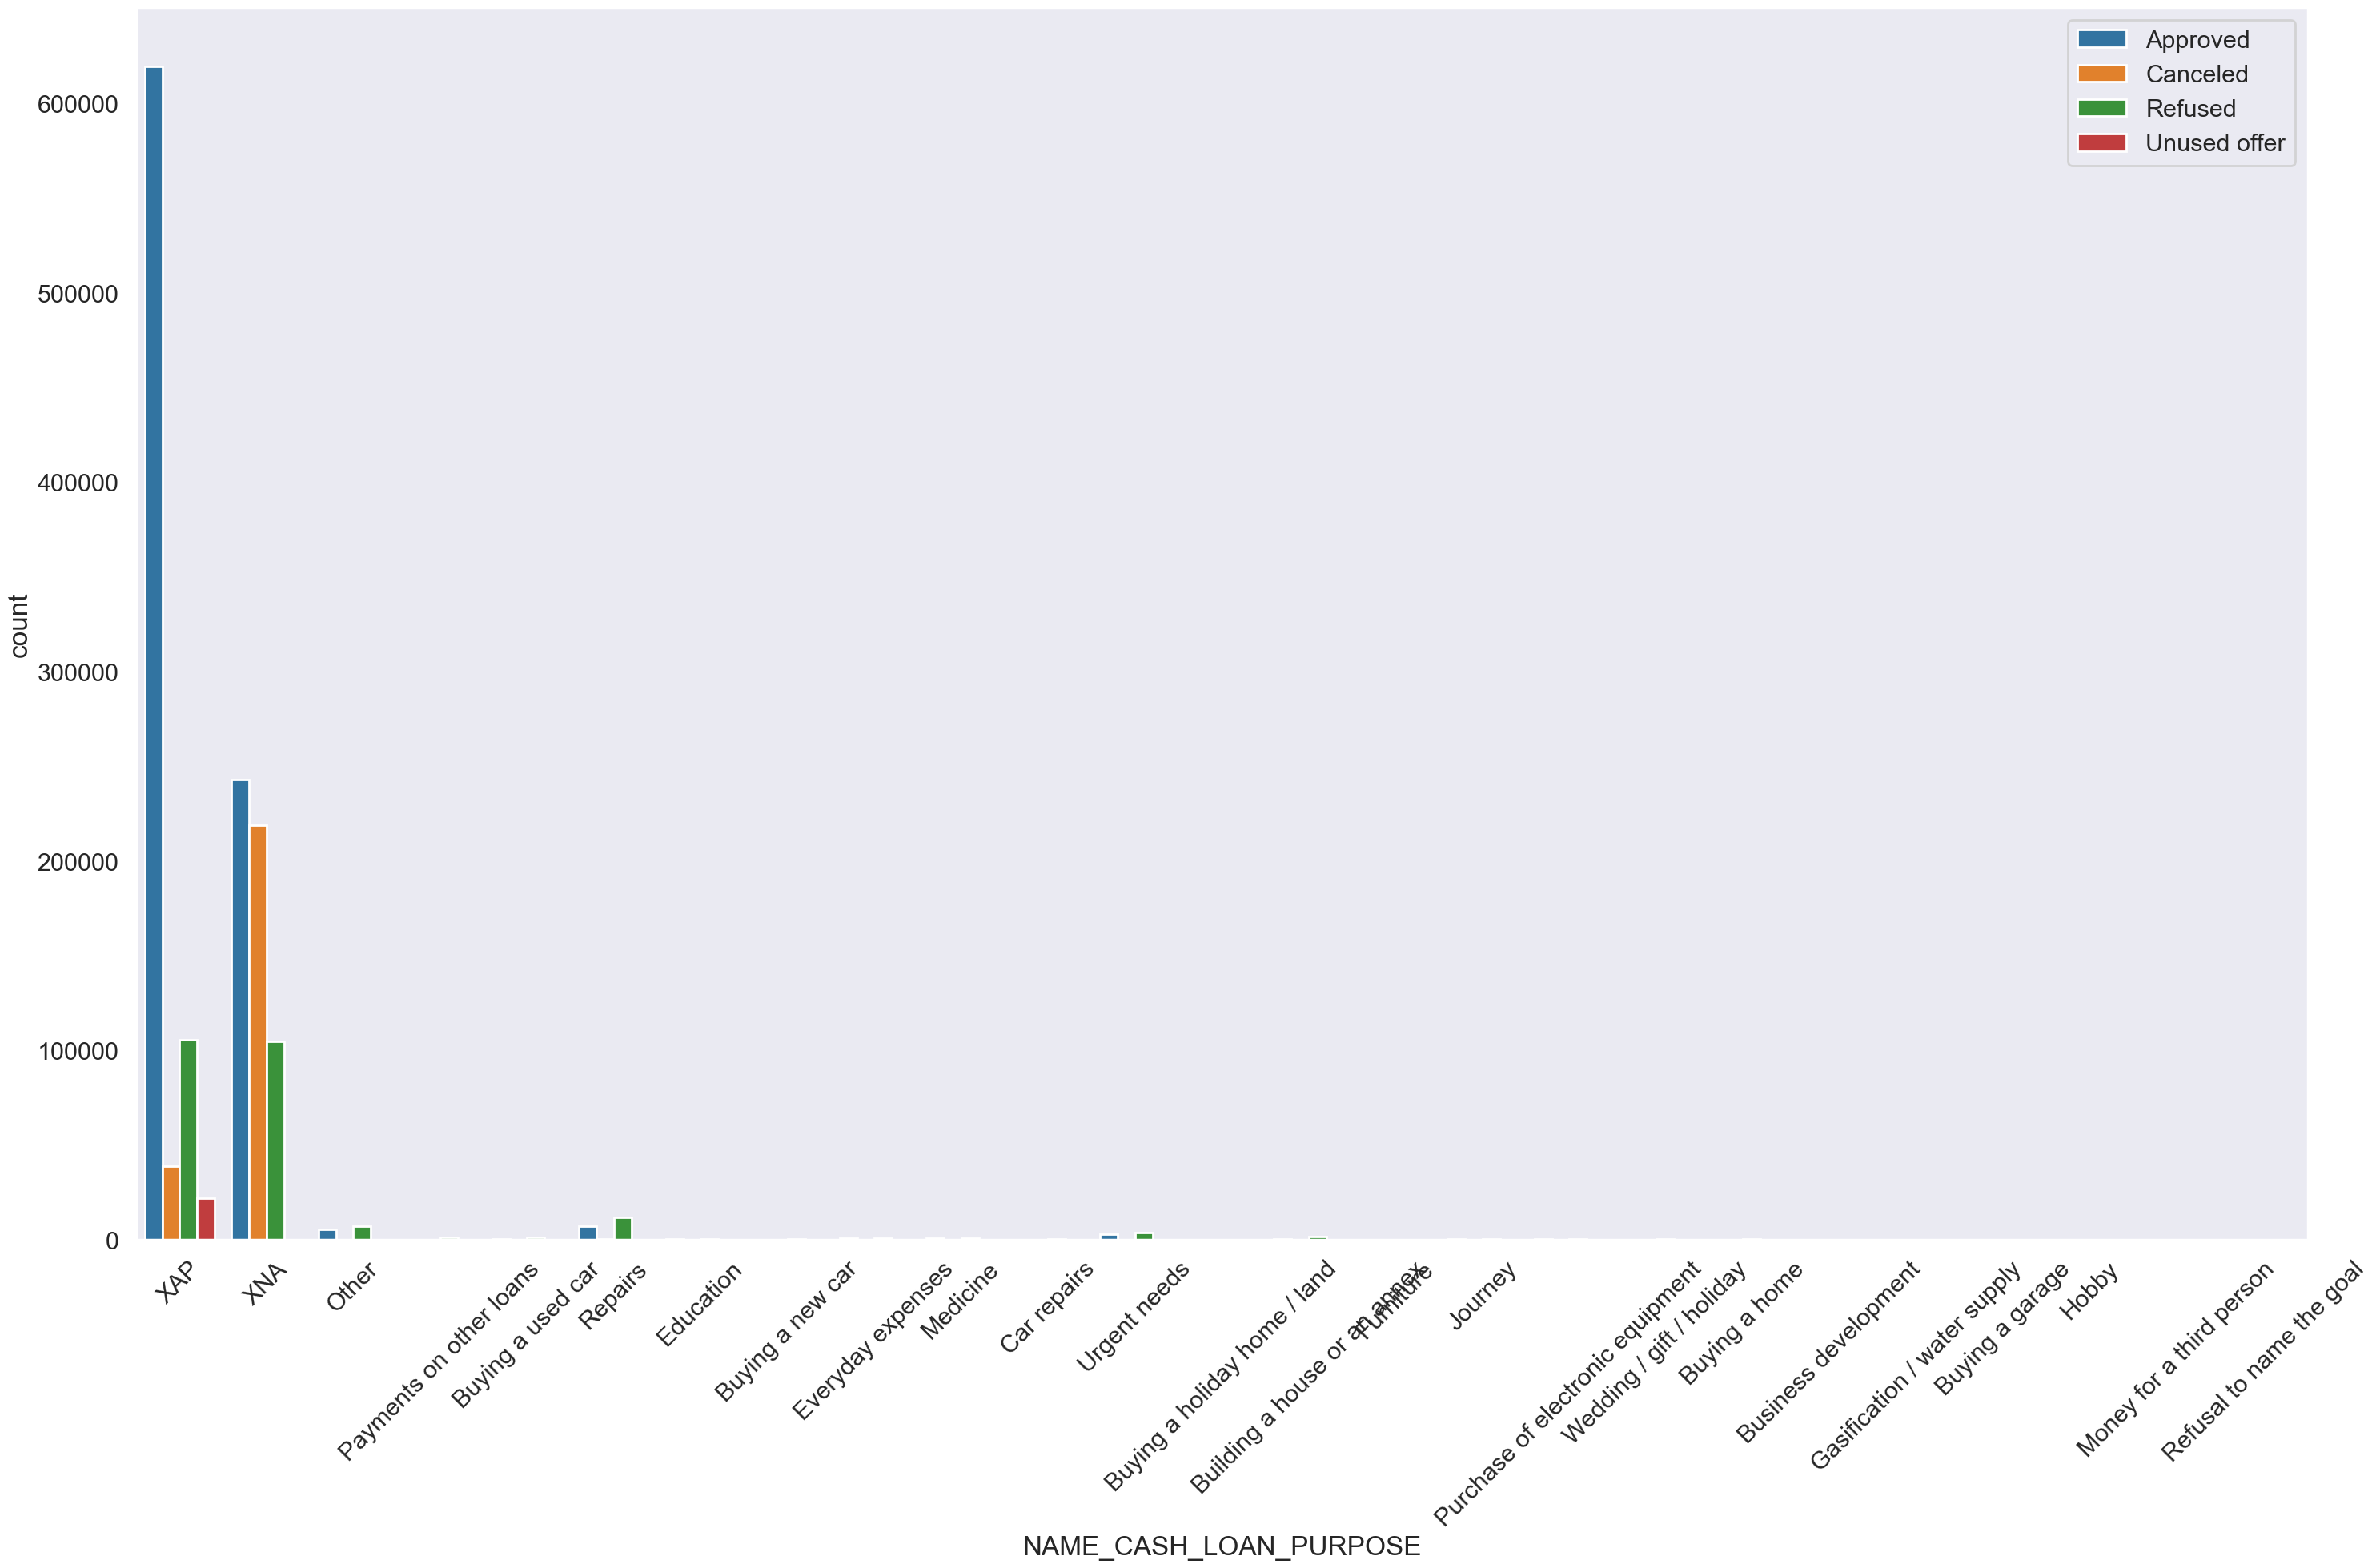

In [47]:
# Bar plot for purpose of loan vs status of loan
sns.set_style('dark')
sns.set_context('poster')

plt.figure(figsize=(35,20))
sns.countplot(data=data_merge,x="NAME_CASH_LOAN_PURPOSE",hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.show()

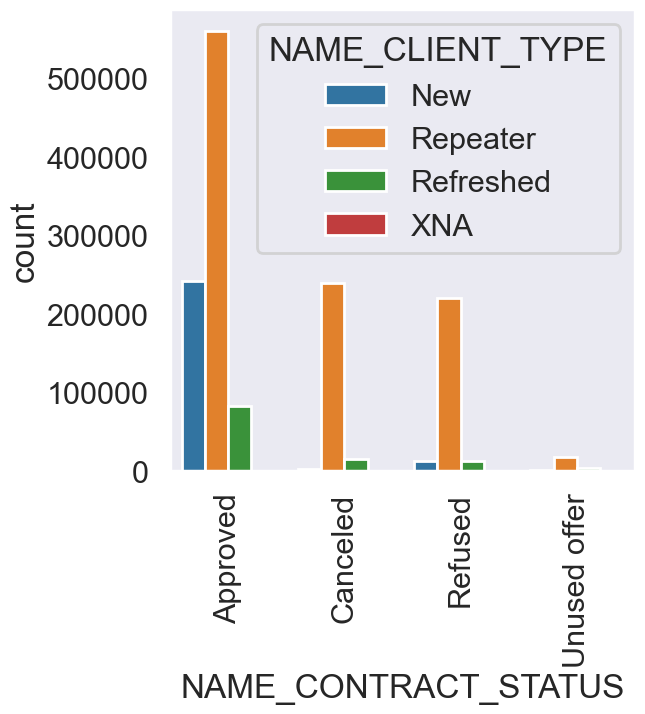

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(data=data_merge,x="NAME_CONTRACT_STATUS",hue="NAME_CLIENT_TYPE")
plt.xticks(rotation = 90)
plt.show()

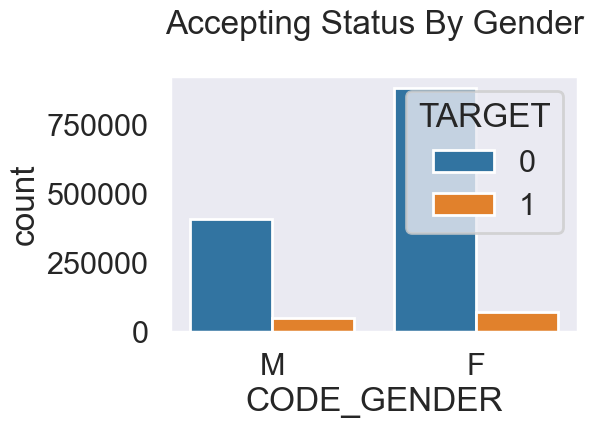

In [49]:
# Bar plott for repayment rate with respect to gender 
sns.countplot(data=data_merge, x = data_merge['CODE_GENDER'], hue=data_merge['TARGET'])
plt.title('Accepting Status By Gender')
plt.tight_layout()
plt.show()


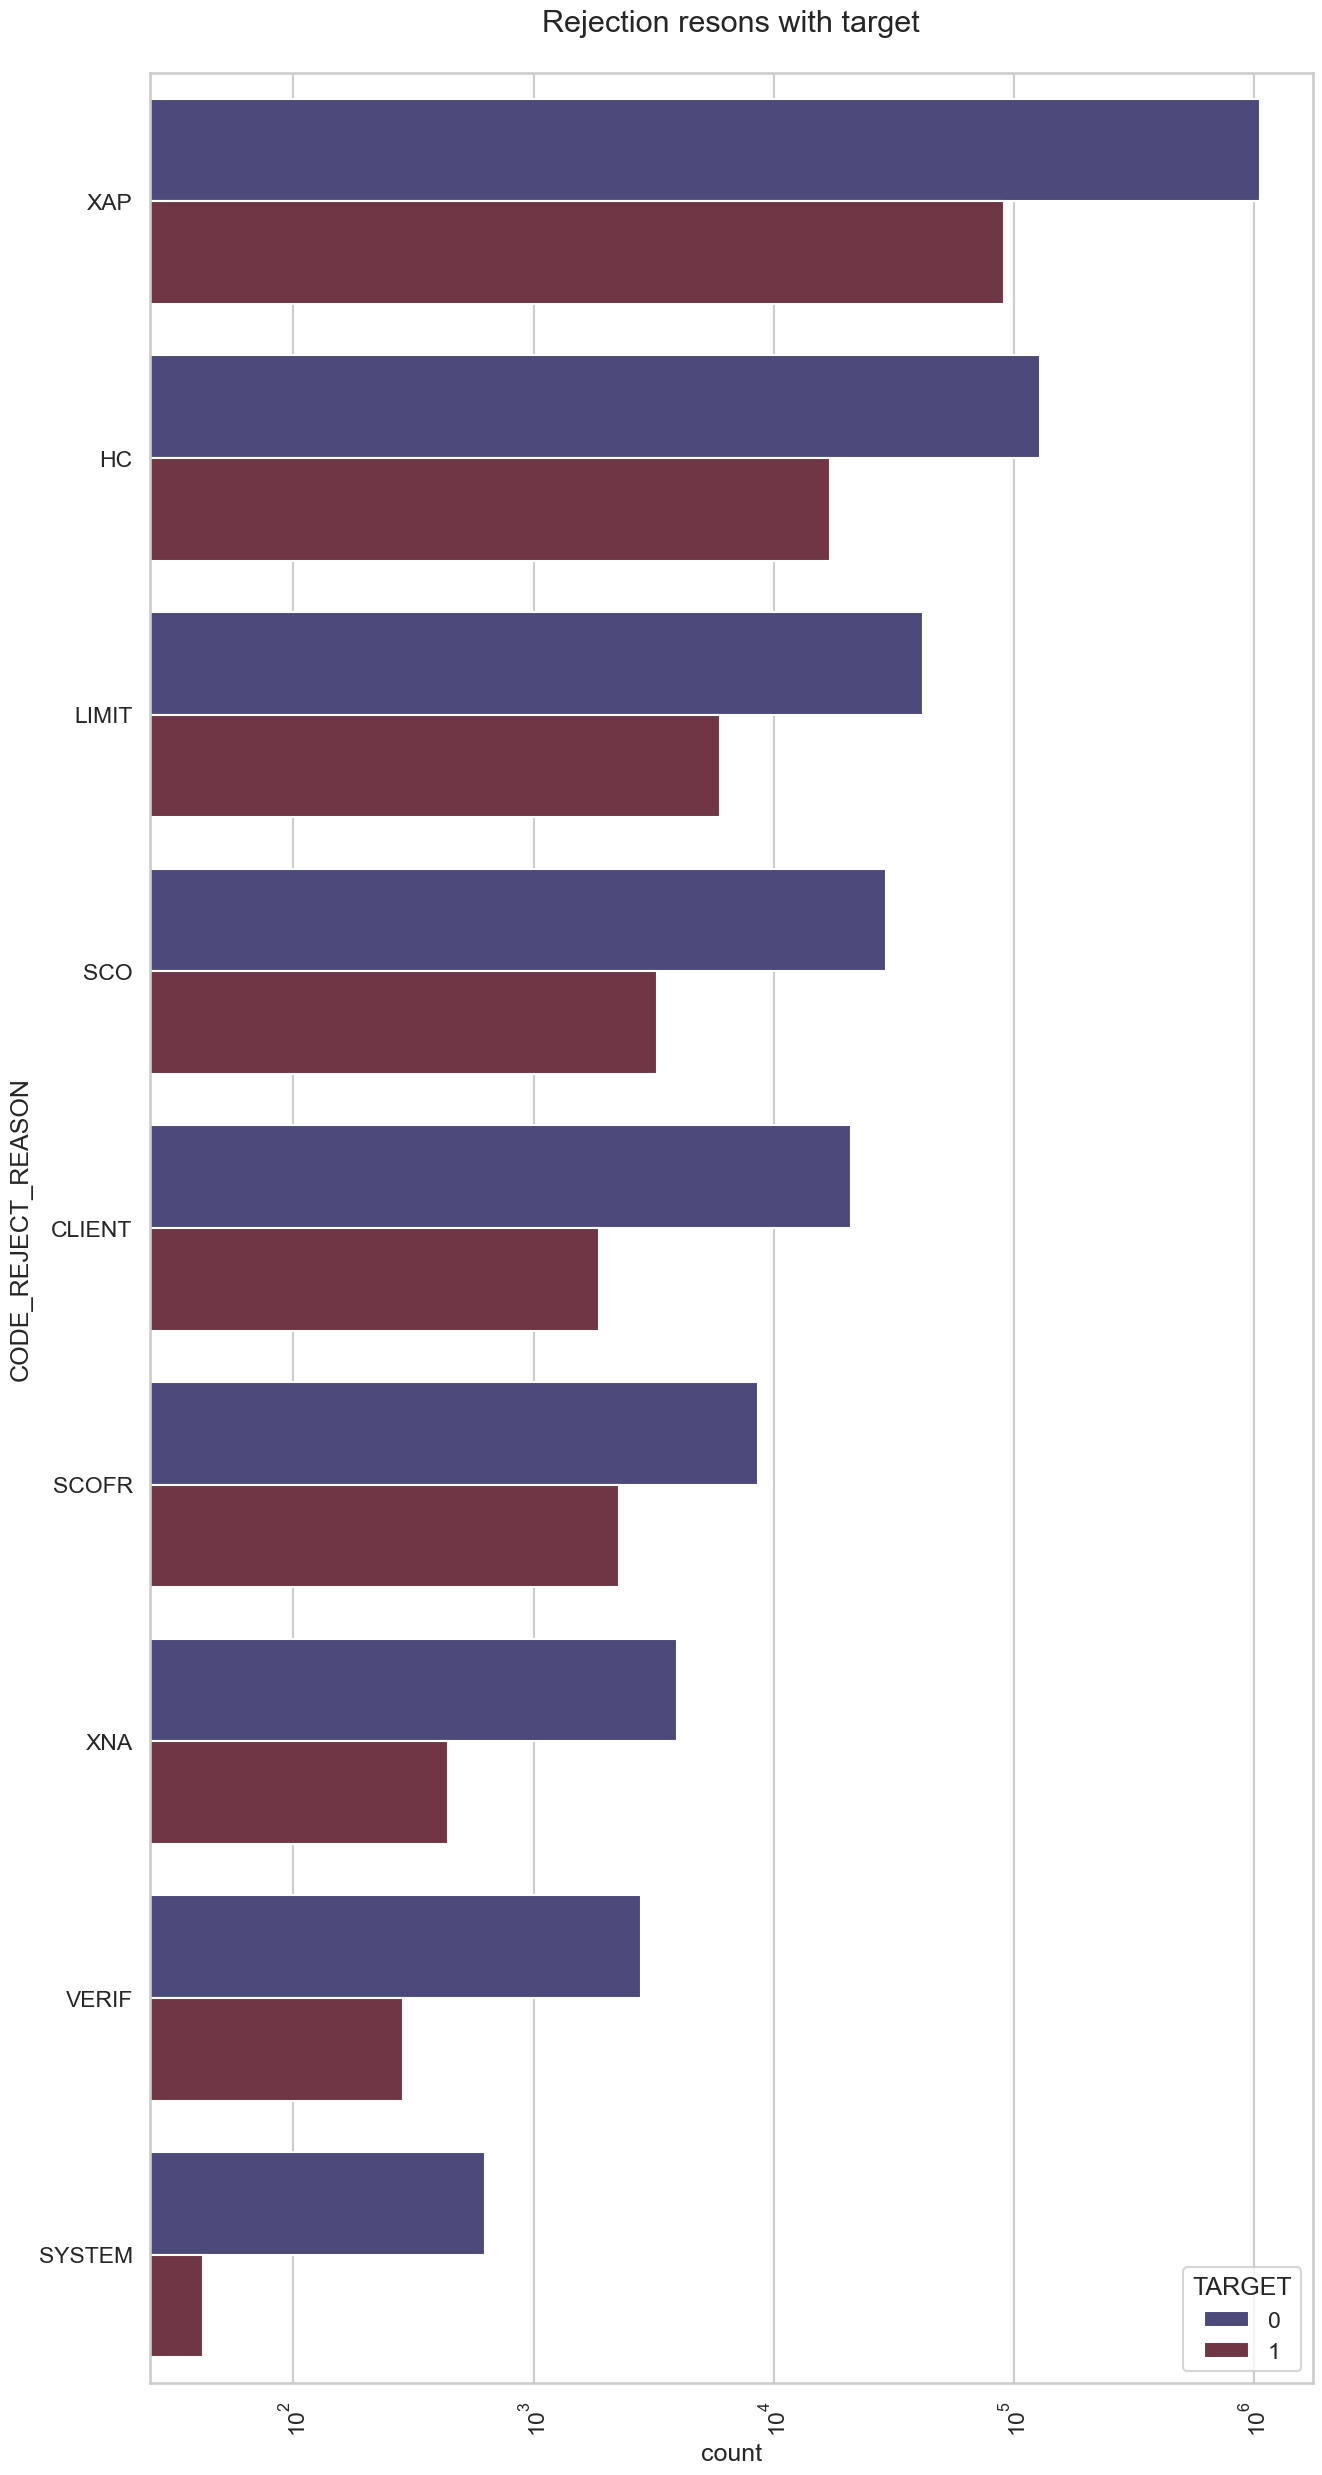

In [50]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Rejection resons with target')

ax = sns.countplot(data = data_merge, y= 'CODE_REJECT_REASON', order=data_merge['CODE_REJECT_REASON'].value_counts().index, hue ='TARGET', palette='icefire')

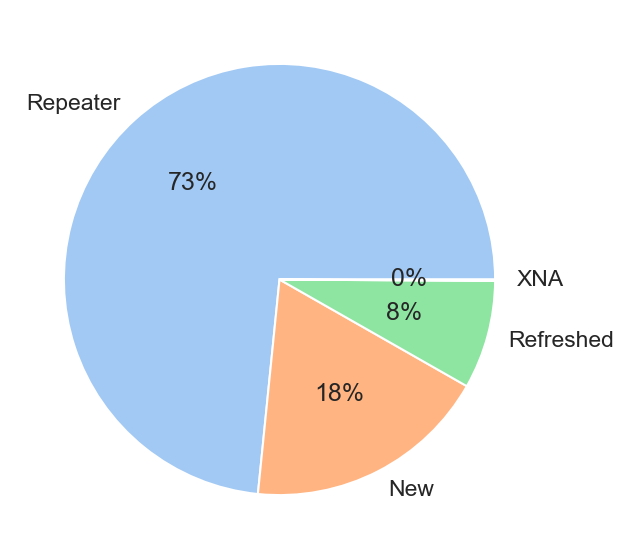

In [51]:
# Pie chart for client type
pie=data_merge["NAME_CLIENT_TYPE"].value_counts().reset_index()
pie.columns=["NAME_CLIENT_TYPE","count"]
plt.figure(figsize=(12,7))
color=sns.color_palette("pastel")
plt.pie(pie["count"],colors=color,autopct='%.0f%%',labels=pie["NAME_CLIENT_TYPE"])
plt.show()

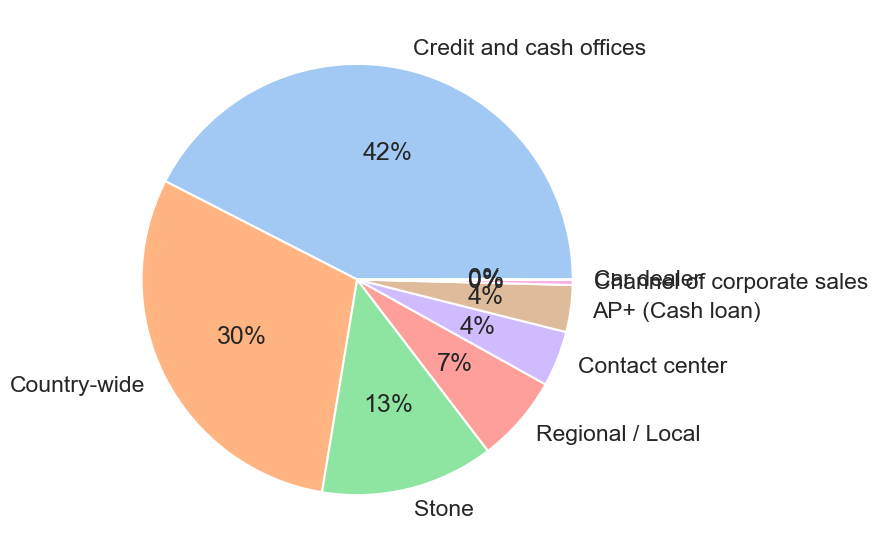

In [52]:
# Pie chart for client aquired type
pie=data_merge["CHANNEL_TYPE"].value_counts().reset_index()
pie.columns=["CHANNEL_TYPE","count"]
plt.figure(figsize=(12,7))
color=sns.color_palette("pastel")
plt.pie(pie["count"],colors=color,autopct='%.0f%%',labels=pie["CHANNEL_TYPE"])
plt.show()